

# Evolution in Closed Systems
We have covered what a quantum state is, and how we can pull out samples from a quantum state, and now it's time to look at how we do quantum a computation. In other words, how we evolve this probability distribution. So we started with closed systems, which means that evolution is going to be unitary. This is the idealized version of a quantum calculation. But before we actually explain what it means and what it implies, let's take a look at how we transform classical probability distributions. Stochastic vectors fulfill certain conditions,

# Unitary evolution

Recap 
$$\boldsymbol{p}=\left[\begin{array}{c}
p_{0}\\
p_{1}
\end{array}\right]\qquad\begin{array}{c}
p_{i}\geq0\\
\sum p_{i}=0
\end{array}$$

where $\boldsymbol{p}$ is a stochastic vector

and we transform them with something called stochastic matrices.

$$M\boldsymbol{p}=\boldsymbol{p}'$$

where M is a stochastic matrix.

So after the transformation, whatever you get is still a stochastic vector. It's still a probability distribution. And in this case, this is a left stochastic matrix, which means that the columns of this matrix add up to 1. So when it comes to quantum states, we want to apply some operation on the state. 

$$U\mid\psi\rangle=\mid\psi'\rangle$$

And whatever we get, we want to be sure that this is still a quantum state. So the matrix U that fulfills this condition has the probability that it's unitary. Unitary means that if you apply it's convex conjugate you get the identity. 

$$UU^{\dagger}=I$$

Which means that the complex conjugate of the matrix is its actual inverse. It is also true if you apply the complex conjugate first and then the matrix itself. 

$$UU^{\dagger}=U^{\dagger}U$$

That's all that the operation has to fulfill. And as I mentioned, this is this idealized computation that the quantum computer executes. And it has some consequences. Obviously, it preserves the L2 norm. 

For Quantum states: 

Ideal Quantum computers implement unitary operations. Some properties 

Presents:

1. $l_{2}$ norms

2. Linear 

3. Reversible (digital computing)

Otherwise, the final result would not be a quantum state.

$U\mid\psi\rangle=\underbrace{\mid\psi'\rangle}_{\text{quantum state}}$

And it's also linear, since we are only applying matrix on a vector U. This becomes a little bit difficult when we want to apply nonlinear operations. For instance, we want to do some machine learning algorithm that's intrinsically nonlinear, then we have to resort to all sorts of approximations and tricks. Then the calculation is reversible. So that comes from this property. We can always invert this matrix U^{\dagger}. So this is in stark contrast with what you see in digital computing, because in digital computing you actually lose information as you proceed in a calculation. For instance, if you apply an end operation, just by looking at the outcome of this end logical gate, you will not be able to tell what were the two initial bits that went into this gate. So you lose information. This cannot happen in this idealized quantum system. As an example, let's look at this operation which is also called the NOT gate or the X gate.Example: $$X=\left[\begin{array}{cc}
0 & 1\\
1 & 0
\end{array}\right]$$

So if we look at what's its complex conjugate. Well, it's a symmetrical real matrix, so it's complex conjugate transposed is going to be itself.

$$X^{\dagger}=\left[\begin{array}{cc}
0 & 1\\
1 & 0
\end{array}\right]$$

It's the same as X. Now, if we apply this gate on the 0 ket, we can write out what that means.

$$X\mid0\rangle=\left[\begin{array}{cc}
0 & 1\\
1 & 0
\end{array}\right]\left[\begin{array}{c}
1\\
0
\end{array}\right]=X$$

Then if you were to perform the matrix vector multiplication, then you're going to see that it flips it into the 1 ket. You can very easily check that it does the same thing on the 0 ket. 

$$X\mid1\rangle=\mid0\rangle$$

Now, when you apply to a generic quantum state, which is a superposition of the two basis vectors, then since it's a linear it's going to distribute to the individual elements of the qubit. 

$$X\mid\psi\rangle=X(a_{0}\mid0\rangle+a_{1}\mid1\rangle)$$ So if you have x applied to the 0 ket, and then x applied to the 1 ket-- in other words, you just have A0 times the 1 ket and A1 times the 0 ket. 

$$X\mid\psi\rangle=X(a_{0}\mid0\rangle+a_{1}\mid1\rangle=a_{0}X\mid0\rangle+a_{1}X\mid1\rangle=a_{0}\mid1\rangle+a_{1}\mid0\rangle$$

$$\Downarrow$$

So if we apply the inverse operation to the same thing, we actually get back the initial state that we started with. So you can see that it is actually invertible, and you can restore the original state after applying it. 

$$X^{\dagger}\left(a_{0}\mid1\rangle+a_{1}\mid0\rangle\right)$$

Checkbox

• A unitary matrix is always Hermitian. 

– False

• What's the effect of $$X^{\dagger}XX^{\dagger}X ?X^{\dagger}XX^{\dagger}X=I$$

– $I$


Classical probability distributions can be written as a stochastic vector, which can be transformed to another stochastic vector by applying a stochastic matrix. In other words, the evolution of stochastic vectors can be described by a stochastic matrix.

Quantum states also evolve and their evolution is described by unitary matrices. This leads to some interesting properties in quantum computing. Unitary evolution is true for a closed system, that is, a quantum system perfectly isolated from the environment. This is not the case in the quantum computers we have today: these are open quantum systems that evolve differently due to to uncontrolled interactions with the environment. In this notebook, we take a glimpse at both types of evolution.


# More on the Unitary evolution

A unitary matrix has the property that its conjugate transpose is its inverse. Formally, it means that a matrix $U$ is unitary if $UU^\dagger=U^\dagger U=\mathbb{1}$, where $^\dagger$ stands for conjugate transpose, and $\mathbb{1}$ is the identity matrix. A quantum computer is a machine that implements unitary operations.

As an example, we have seen the NOT operation before, which is performed by the X gate in a quantum computer. While the generic discussion on gates will only occur in a subsequent notebook, we can study the properties of the X gate. Its matrix representation is $X = \begin{bmatrix} 0 & 1\\ 1 & 0\end{bmatrix}$. Let's check if it is indeed unitary:

In [1]:
import numpy as np
X = np.array([[0, 1], [1, 0]])
print("XX^dagger")
print(X @ X.T.conj())
print("X^daggerX")
print(X.T.conj() @ X)

XX^dagger
[[1 0]
 [0 1]]
X^daggerX
[[1 0]
 [0 1]]


It looks like a legitimate unitary operation. The unitary nature ensures that the $l_2$ norm is preserved, that is, quantum states are mapped to quantum states.

In [2]:
print("The norm of the state |0> before applying X")
zero_ket = np.array([[1], [0]])
print(np.linalg.norm(zero_ket))
print("The norm of the state after applying X")
print(np.linalg.norm(X @ zero_ket))

The norm of the state |0> before applying X
1.0
The norm of the state after applying X
1.0


Furthermore, since the unitary operation is a matrix, it is linear. Measurements are also represented by matrices. These two observations imply that everything a quantum computer implements is actually linear. If we want to see some form of nonlinearity, that must involve some classical intervention.

Another consequence of the unitary operations is reversibility. Any unitary operation can be reversed. Quantum computing libraries often provide a function to reverse entire circuits. Reversing the X gate is simple: we just apply it again (its conjugate transpose is itself, therefore $X^2=\mathbb{1}$).

In [3]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer as Aer
from qiskit.tools.visualization import circuit_drawer
np.set_printoptions(precision=3, suppress=True)

backend_statevector = Aer.get_backend('statevector_simulator')
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.x(q[0])
circuit.x(q[0])
job = execute(circuit, backend_statevector)
print(job.result().get_statevector(circuit))

[1.+0.j 0.+0.j]


which is exactly $|0\rangle$ as we would expect.

In the next notebook, you will learn about classical and quantum many-body systems and the Hamiltonian. In the notebook on adiabatic quantum computing, you will learn that a unitary operation is in fact the Schrödinger equation solved for a Hamiltonian for some duration of time. This connects the computer science way of thinking about gates and unitary operations to actual physics, but there is some learning to be done before we can make that connection. Before that, let us take another look at the interaction with the environment.

# Open Quantum Systems

SPEAKER: We talked about evolution in closed systems, which is exactly what a universal idealized quantum computer wants to achieve. Real quantum systems, however, are not closed systems. They are open systems. Which means that if you have a system of interest, for instance, your quantum processor, it actually is embedded in an environment or a thermal bath. And what happens is that your system interacts with this environment in a largely uncontrolled fashion. And since this interaction happens, the system's own evolution is no longer described as a unitary operation. It's described by a very different mathematical object. Technically speaking, it's a CPTP map, which stands for Completely Positive Trace Preserving map. But we are not going to work with this, we just have to keep this picture in mind that you have a system interacting with an environment which destroys the unitary nature of the evolution. So to get a sense of what is going on, let's talk about decoherence. 

$$v\rho+\frac{(1-v)I}{\underbrace{d}_{\text{Random noise}}}$$

where $$v\in[0:1]$$ is visibility

So we introduced density matrices. So when I take the density matrix of a pure state-- for instance, take the density matrix of the equal superposition of the 0 and the 1 ket $$\frac{1}{\sqrt{2}}\left(\mid00\rangle+\mid11\rangle\right)$$.

$$\underbrace{\left(\begin{array}{cc}
0.5 & 0.5\\
0.5 & 0.5
\end{array}\right)}_{\frac{1}{\sqrt{2}}\left(\mid00\rangle+\mid11\rangle\right)}\rightarrow\left(\begin{array}{cc}
0.5 & 0.3\\
0.3 & 0.5
\end{array}\right)\rightarrow\left(\begin{array}{cc}
0.5 & 0\\
0 & 0.5
\end{array}\right)$$

And we can mix it with random noise, which is just the identity matrix divided by the number of dimensions. So this would correspond to the maximally mixed state-- the classical uniform distribution. And we can control how much noise we have by tuning this parameter called invisibility between 0 and 1. So over at invisibility 1 we have the pure state, but the lower invisibility we mix in this maximal and mixed state. And the more we mix, the more the coherences vanish. And when we reach 0 visibility, we end up with a maximally mixed state. So the speed at which happens affects our quantum calculations. Because we want to finish the calculation before this system completely decoheres. 

$$\left(\begin{array}{cc}
0.5 & \underbrace{0}_{T2}\\
\underbrace{0}_{T2} & 0.5
\end{array}\right)$$


This is sometimes called the T2 time, and it's one of the characteristics that you look at when you study how good a quantum computer is. Another way of looking at it is an equilibriation process. So this model is actually the exact same thing-- what happens to a cup of coffee. So if you take a cup of coffee and you remove the lid, then you will have a lot of interaction between the environment, in the room where you are in, and your coffee. So it's going to cool down and it is going to attain the temperature of the environment. So this is when it becomes in a thermal equilibrium with the environment. Once this happens, you are in a particular state. And for the quantum system, this is called the thermal state. And this is a very specific form. The configurations corresponding to certain energies follow a particular probability distribution, which is the Boltzmann distribution.

So here we have the exponential of the energy divided by the temperature. This is the temperature. Divided by the partition function Z, which is just a normalization factor so that you are actually having a probability distribution. 

$$P(E_{i})=\frac{\exp(-\frac{E_{i}}{T})}{Z}$$

$$Z=\sum\exp(-\frac{E_{i}}{T})$$ 

So now, if you look at what it means, if you have 0 temperature, then this is just the single point which is called the ground state. If you have some finite temperature, then this is going to look something like this. So this is some finite temperature. And if you go to the infinite temperature limit then this completely flattens out, which also means that this energy distribution is basically the uniform distribution. So this, again, correspondence to the case of a maximally mixed state. 

Check

• In an open system, a quantum system interacts with a bath, changing the temperature of the bath. 

– False

• During the process of decoherence, the off-diagonal elements of the density matrix vanish. 

– True

• At infinite temperature, the energy distribution of the thermal state is.. 

– uniform



# Interaction with the environment: open systems

Actual quantum systems are seldom closed: they constantly interact with their environment in a largely uncontrolled fashion, which causes them to lose coherence. This is true for current and near-term quantum computers too.

<img src="figures/open_system.svg" alt="A quantum processor as an open quantum system" style="width: 400px;"/>

This also means that their actual time evolution is not described by a unitary matrix as we would want it, but some other operator (the technical name for it is a completely positive trace-preserving map).

Quantum computing libraries often offer a variety of noise models that mimic different types of interaction, and increasing the strength of the interaction with the environment leads to faster decoherence. The timescale for decoherence is often called $T_2$ time. Among a couple of other parameters, $T_2$ time is critically important for the number of gates or the duration of the quantum computation we can perform.

A very cheap way of studying the effects of decoherence is mixing a pure state with the maximally mixed state $\mathbb{1}/2^d$, where $d$ is the number of qubits, with some visibility parameter in $[0,1]$. This way we do not have to specify noise models or any other map modelling decoherence. For instance, we can mix the $|\phi^+\rangle$ state with the maximally mixed state:

In [4]:
def mixed_state(pure_state, visibility):
    density_matrix = pure_state @ pure_state.T.conj()
    maximally_mixed_state = np.eye(4)/2**2
    return visibility*density_matrix + (1-visibility)*maximally_mixed_state

ϕ = np.array([[1],[0],[0],[1]])/np.sqrt(2)
print("Maximum visibility is a pure state:")
print(mixed_state(ϕ, 1.0))
print("The state is still entangled with visibility 0.8:")
print(mixed_state(ϕ, 0.8))
print("Entanglement is lost by 0.6:")
print(mixed_state(ϕ, 0.6))
print("Barely any coherence remains by 0.2:")
print(mixed_state(ϕ, 0.2))

Maximum visibility is a pure state:
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
The state is still entangled with visibility 0.8:
[[0.45 0.   0.   0.4 ]
 [0.   0.05 0.   0.  ]
 [0.   0.   0.05 0.  ]
 [0.4  0.   0.   0.45]]
Entanglement is lost by 0.6:
[[0.4 0.  0.  0.3]
 [0.  0.1 0.  0. ]
 [0.  0.  0.1 0. ]
 [0.3 0.  0.  0.4]]
Barely any coherence remains by 0.2:
[[0.3 0.  0.  0.1]
 [0.  0.2 0.  0. ]
 [0.  0.  0.2 0. ]
 [0.1 0.  0.  0.3]]


Another way to look at what happens to a quantum state in an open system is through equilibrium processes. Think of a cup of coffee: left alone, it will equilibrate with the environment, eventually reaching the temperature of the environment. This includes energy exchange. A quantum state does the same thing and the environment has a defined temperature, just like the environment of a cup of coffee.

The equilibrium state is called the thermal state. It has a very specific structure and we will revisit it, but for now, suffice to say that the energy of the samples pulled out of a thermal state follows a Boltzmann distribution. The Boltzmann -- also called Gibbs -- distribution is described as $P(E_i) = \frac {e^{-E_{i}/T}}{\sum _{j=1}^{M}{e^{-E_{j}/T}}}$, where $E_i$ is an energy, and $M$ is the total number of possible energy levels. Temperature enters the definition: the higher the temperature, the closer we are to the uniform distribution. In the infinite temperature limit, it recovers the uniform distribution. At high temperatures, all energy levels have an equal probability. In contrast, at zero temperature, the entire probability mass is concentrated on the lowest energy level, the ground state energy. To get a sense of this, let's plot the Boltzmann distribution with vastly different temperatures:

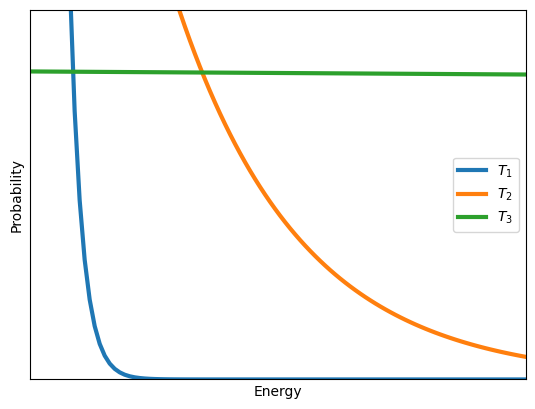

In [5]:
import matplotlib.pyplot as plt

temperatures = [.5, 5, 2000]
energies = np.linspace(0, 20, 100)
fig, ax = plt.subplots()
for i, T in enumerate(temperatures):
    probabilities = np.exp(-energies/T)
    Z = probabilities.sum()
    probabilities /= Z
    ax.plot(energies, probabilities, linewidth=3, label = "$T_" + str(i+1)+"$")
ax.set_xlim(0, 20)
ax.set_ylim(0, 1.2*probabilities.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Energy')
ax.set_ylabel('Probability')
ax.legend()

Here $T_1<T_2<T_3$. Notice that $T_1$ is a low temperature, and therefore it is highly peaked at low energy levels. In contrast, $T_3$ is a very high temperature and the probability distribution is almost completely flat.